In [1]:
import json
import pandas as pd
import numpy as np
import os
import sys

In [2]:
import matplotlib.pyplot as plt

## Participant experiments

In [164]:
with open("experiments/part_test_5_v3.json", "r") as file:
    part_exp = json.load(file)

In [165]:
for key in part_exp:
    part_exp[key]['test'] = key

In [166]:
exp_list = []
for k in part_exp:
    exp_list.append(part_exp[k])

In [167]:
df = pd.DataFrame(exp_list)

In [168]:
overall = {
    "Accuracy": 0.91,	
    "Precision (Micro)": 0.91,	
    "Precision (Macro)": 0.91,	
    "Recall (Micro)": 0.91,	
    "Recall (Macro)": 0.91,	
    "F1 (Micro)": 0.90,	
    "F1 (Macro)": 0.90,
    "test": "Overall"
}

In [169]:
df

,Accuracy,Precision (Micro),Precision (Macro),Recall (Micro),Recall (Macro),F1 (Micro),F1 (Macro),test
0,0.711485,0.711485,0.727816,0.711485,0.711485,0.711485,0.706535,1 2 3 4 5
1,0.659384,0.659384,0.692011,0.659384,0.659384,0.659384,0.653924,2 3 4 5 6
2,0.703081,0.703081,0.740573,0.703081,0.703081,0.703081,0.702342,3 4 5 6 7
3,0.765266,0.765266,0.774937,0.765266,0.765266,0.765266,0.760153,4 5 6 7 8
4,0.766947,0.766947,0.776965,0.766947,0.766947,0.766947,0.762283,5 6 7 8 9
5,0.781513,0.781513,0.786068,0.781513,0.781513,0.781513,0.775708,6 7 8 9 10
6,0.802801,0.802801,0.806106,0.802801,0.802801,0.802801,0.796379,7 8 9 10 11
7,0.788235,0.788235,0.788134,0.788235,0.788235,0.788235,0.781518,8 9 10 11 12
8,0.761905,0.761905,0.767192,0.761905,0.761905,0.761905,0.755498,9 10 11 12 13
9,0.770308,0.770308,0.771977,0.770308,0.770308,0.770308,0.767872,10 11 12 13 14


In [170]:
df[df["test"].str.contains("^1 | 1 ")]

,Accuracy,Precision (Micro),Precision (Macro),Recall (Micro),Recall (Macro),F1 (Micro),F1 (Macro),test
0,0.711485,0.711485,0.727816,0.711485,0.711485,0.711485,0.706535,1 2 3 4 5


In [171]:
df[df["test"].str.contains("^25 | 25 |25$")].mean(numeric_only=True)

Accuracy             0.747227
Precision (Micro)    0.747227
Precision (Macro)    0.754580
Recall (Micro)       0.747227
Recall (Macro)       0.747227
F1 (Micro)           0.747227
F1 (Macro)           0.742234
dtype: float64

In [172]:
ind_scores = {}
for i in range(1,44):
    pattern = f"^{i} | {i} |{i}$"
    
    sl = df[df["test"].str.contains(pattern)]
    
    averaged_dict = dict(sl.mean(numeric_only=True))
    
    ind_scores[i] = averaged_dict

In [173]:
scores = pd.DataFrame(ind_scores).T

In [174]:
scores.loc[len(scores)+1] = overall

In [175]:
scores

,Accuracy,Precision (Micro),Precision (Macro),Recall (Micro),Recall (Macro),F1 (Micro),F1 (Macro)
1,0.753165,0.753165,0.764383,0.753165,0.753165,0.753165,0.749844
2,0.733333,0.733333,0.748039,0.733333,0.733333,0.733333,0.730065
3,0.725570,0.725570,0.747818,0.725570,0.725570,0.725570,0.722662
4,0.724210,0.724210,0.742102,0.724210,0.724210,0.724210,0.721236
5,0.730322,0.730322,0.747908,0.730322,0.730322,0.730322,0.727357
6,0.746078,0.746078,0.764076,0.746078,0.746078,0.746078,0.743646
7,0.765126,0.765126,0.777459,0.765126,0.765126,0.765126,0.761289
8,0.774720,0.774720,0.781442,0.774720,0.774720,0.774720,0.770096
9,0.772549,0.772549,0.777835,0.772549,0.772549,0.772549,0.767631
10,0.780952,0.780952,0.783895,0.780952,0.780952,0.780952,0.775395


In [176]:
scores

,Accuracy,Precision (Micro),Precision (Macro),Recall (Micro),Recall (Macro),F1 (Micro),F1 (Macro)
1,0.753165,0.753165,0.764383,0.753165,0.753165,0.753165,0.749844
2,0.733333,0.733333,0.748039,0.733333,0.733333,0.733333,0.730065
3,0.725570,0.725570,0.747818,0.725570,0.725570,0.725570,0.722662
4,0.724210,0.724210,0.742102,0.724210,0.724210,0.724210,0.721236
5,0.730322,0.730322,0.747908,0.730322,0.730322,0.730322,0.727357
6,0.746078,0.746078,0.764076,0.746078,0.746078,0.746078,0.743646
7,0.765126,0.765126,0.777459,0.765126,0.765126,0.765126,0.761289
8,0.774720,0.774720,0.781442,0.774720,0.774720,0.774720,0.770096
9,0.772549,0.772549,0.777835,0.772549,0.772549,0.772549,0.767631
10,0.780952,0.780952,0.783895,0.780952,0.780952,0.780952,0.775395


In [177]:
def get_name(x, max_len):

    if x.name < max_len:
        return str(x.name)
    else:
        return "overall"
    

In [178]:
scores['label'] = scores.apply(lambda x: get_name(x, 44), axis = 1)

88


Text(0.5, 1.0, 'Variability in participant performance')

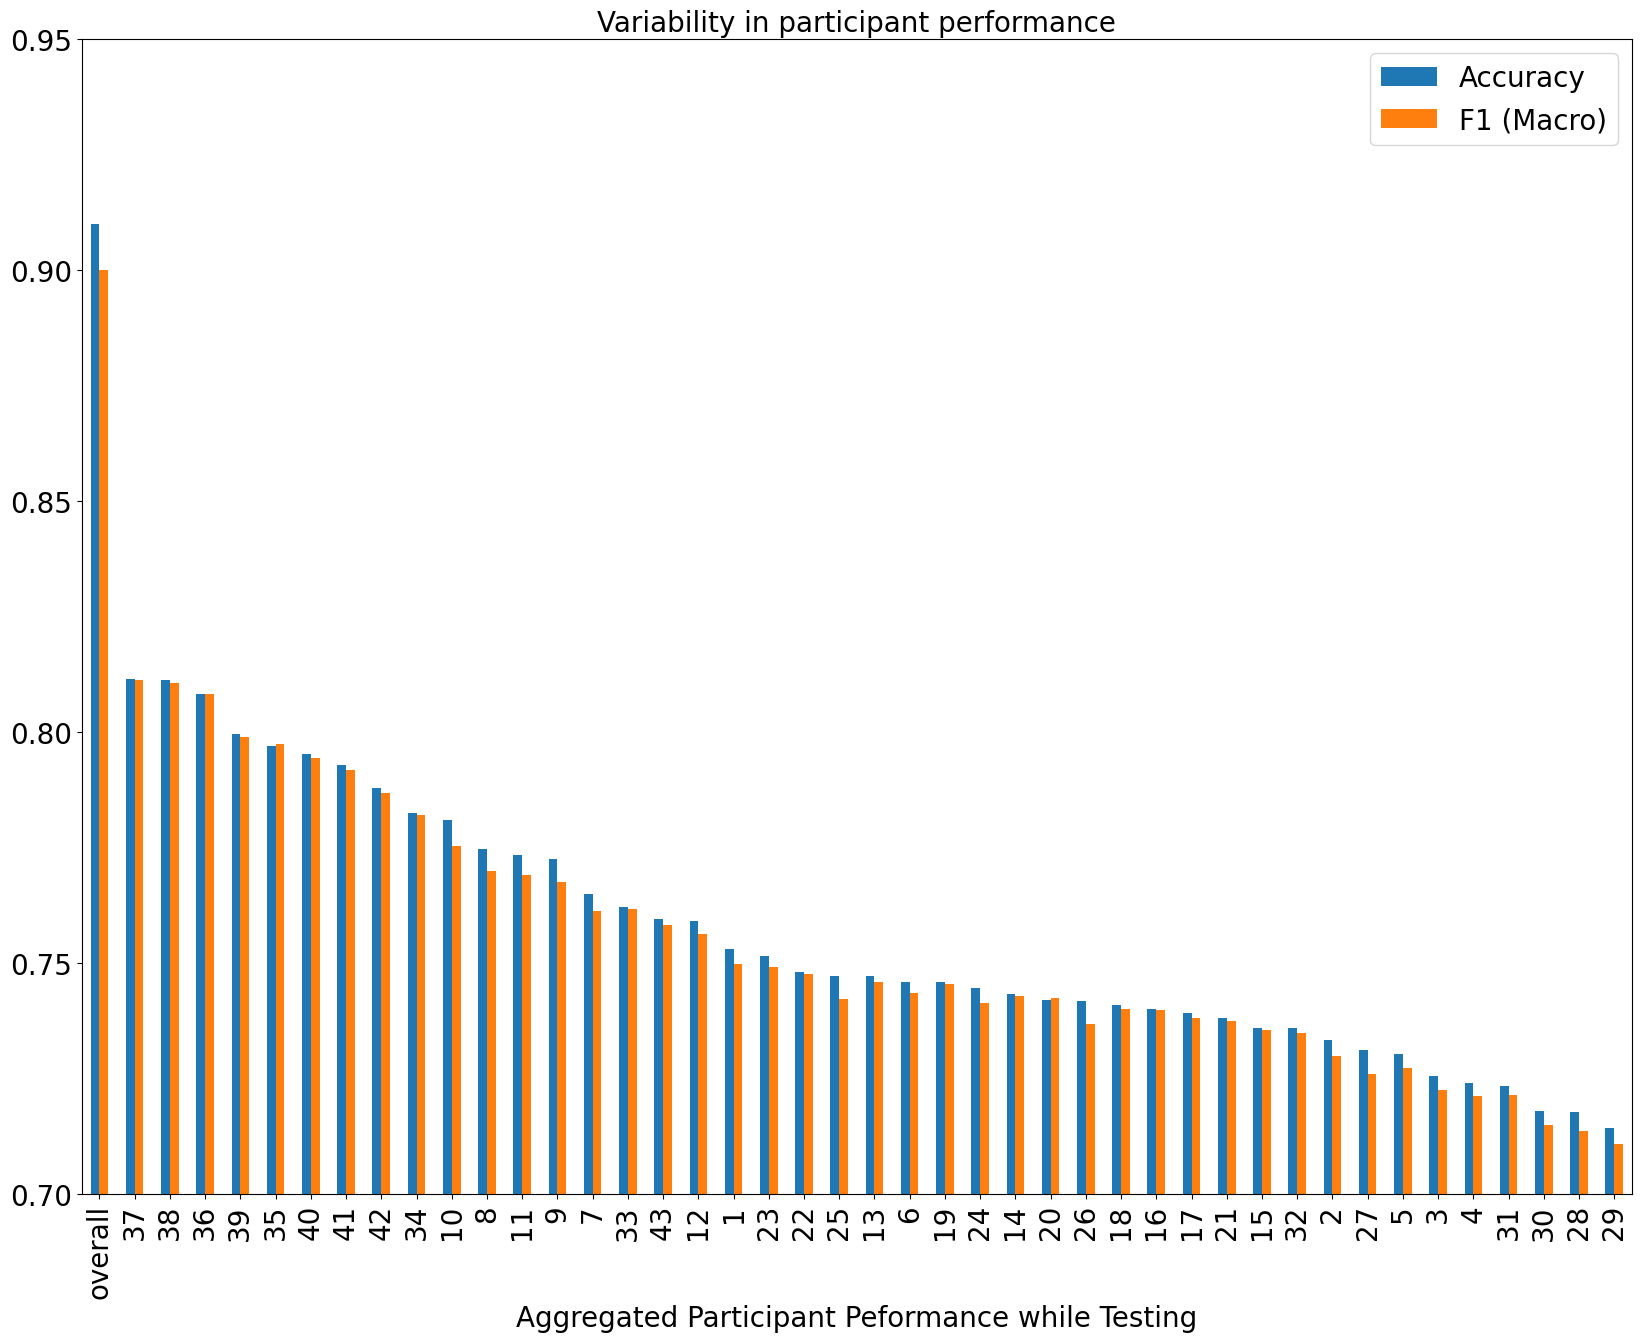

In [180]:

ax = scores.sort_values(by = "Accuracy", ascending=False).plot.bar(x = 'label', y = ["Accuracy", "F1 (Macro)"], figsize = (20,15))
bar_to_color = 'overall'
# ax.patches[0].set_color("green")
# ax.patches[43].set_color("green")

# for bar in ax.patches:
#     if bar.get_height() == df.loc[bar.get_x(), 'Accuracy']:
#         bar.set_color(color)
#     print(bar)
print(len(ax.patches))

plt.ylim([0.7,0.95])
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Aggregated Participant Peformance while Testing", fontsize=20)
plt.title("Variability in participant performance", fontsize=20)

## Sessions

In [144]:
with open("experiments/session_test.json", "r") as file:
    part_exp = json.load(file)

In [145]:
for key in part_exp:
    part_exp[key]['test'] = key

In [146]:
exp_list = []
for k in part_exp:
    exp_list.append(part_exp[k])

In [147]:
df = pd.DataFrame(exp_list)

In [148]:
df

,Accuracy,Precision (Micro),Precision (Macro),Recall (Micro),Recall (Macro),F1 (Micro),F1 (Macro),test
0,0.762752,0.762752,0.760436,0.762752,0.762752,0.762752,0.757883,1
1,0.801251,0.801251,0.804073,0.801251,0.801251,0.801251,0.799103,2
2,0.832714,0.832714,0.834891,0.832714,0.832714,0.832714,0.832007,3


In [149]:
ind_scores = {}
for i in range(1,4):
    pattern = f"^{i} | {i} |{i}$"
    
    sl = df[df["test"].str.contains(pattern)]
    
    averaged_dict = dict(sl.mean(numeric_only=True))
    
    ind_scores[i] = averaged_dict

In [150]:
scores = pd.DataFrame(ind_scores).T

In [151]:
scores

,Accuracy,Precision (Micro),Precision (Macro),Recall (Micro),Recall (Macro),F1 (Micro),F1 (Macro)
1,0.762752,0.762752,0.760436,0.762752,0.762752,0.762752,0.757883
2,0.801251,0.801251,0.804073,0.801251,0.801251,0.801251,0.799103
3,0.832714,0.832714,0.834891,0.832714,0.832714,0.832714,0.832007


In [152]:
scores.loc[len(scores)+1] = overall

In [153]:
scores

,Accuracy,Precision (Micro),Precision (Macro),Recall (Micro),Recall (Macro),F1 (Micro),F1 (Macro)
1,0.762752,0.762752,0.760436,0.762752,0.762752,0.762752,0.757883
2,0.801251,0.801251,0.804073,0.801251,0.801251,0.801251,0.799103
3,0.832714,0.832714,0.834891,0.832714,0.832714,0.832714,0.832007
4,0.910000,0.910000,0.910000,0.910000,0.910000,0.900000,0.900000


In [154]:
scores['label'] = scores.apply(lambda x: get_name(x, 4), axis = 1)

Text(0.5, 1.0, 'Variability in Session performance')

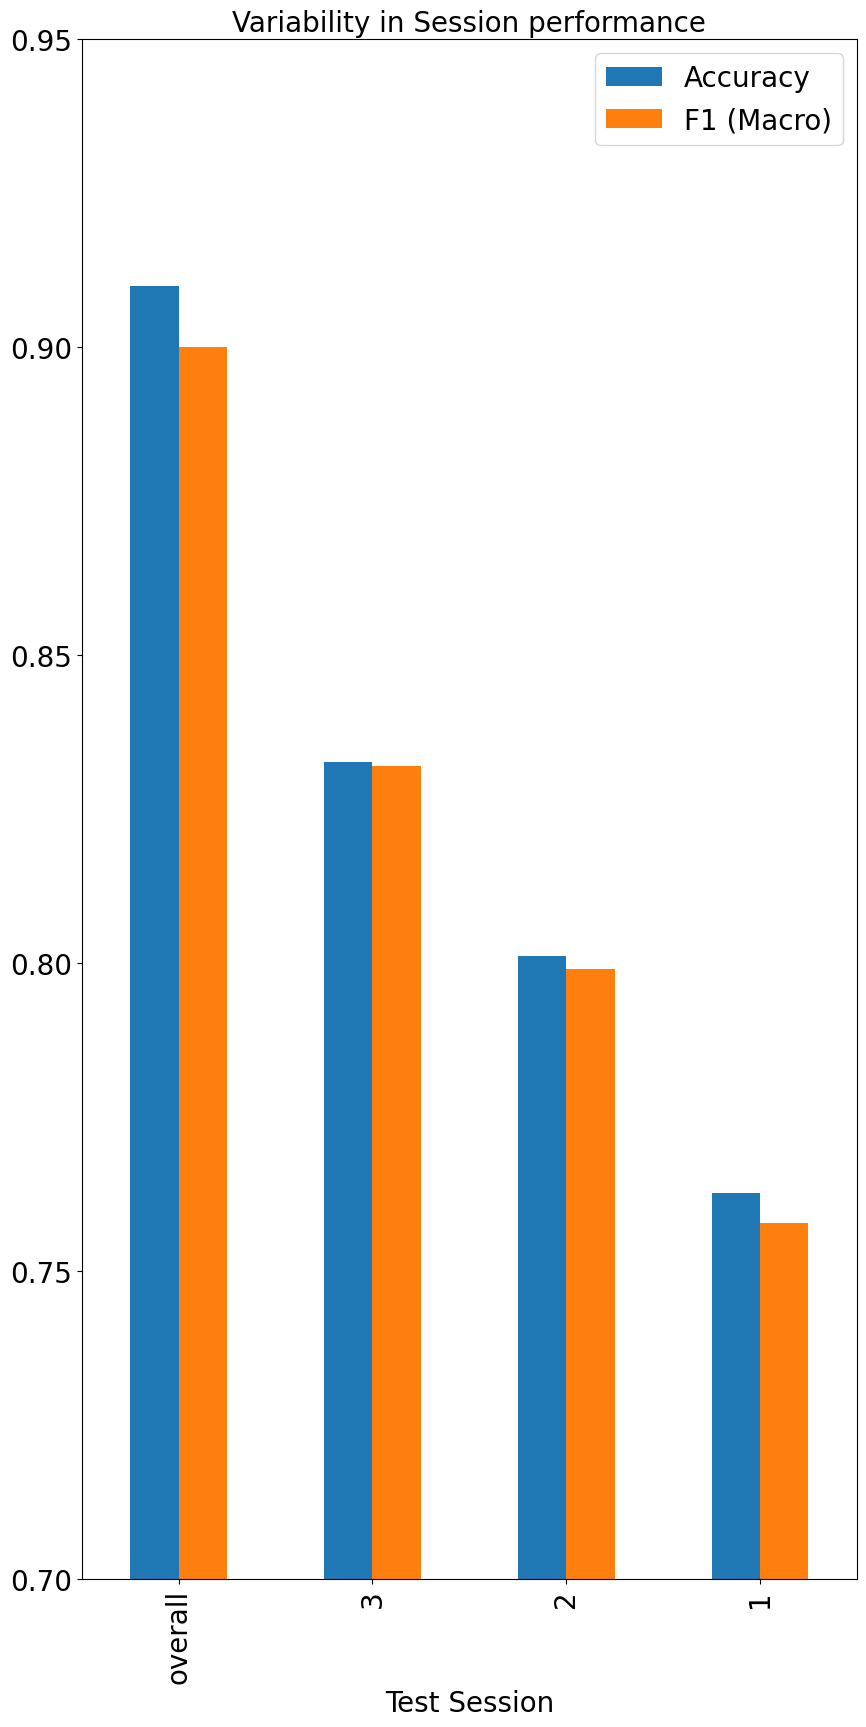

In [163]:

scores.sort_values(by = "Accuracy", ascending=False).plot.bar(x= "label", y = ["Accuracy", "F1 (Macro)"], figsize = (10,20))
plt.ylim([0.7,0.95])
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Test Session", fontsize=20)
plt.title("Variability in Session performance", fontsize=20)

## Analyze Finetune

In [52]:
with open("experiments/untuned_model_results_1_trials.json", "r") as file:
    untuned_trial_1 = json.load(file)
with open("experiments/untuned_model_results_2_trials.json", "r") as file:
    untuned_trial_2 = json.load(file)
with open("experiments/untuned_model_results_3_trials.json", "r") as file:
    untuned_trial_3 = json.load(file)

In [53]:
with open("experiments/tuned_model_results_1_trials.json", "r") as file:
    tuned_trial_1 = json.load(file)
with open("experiments/tuned_model_results_2_trials.json", "r") as file:
    tuned_trial_2 = json.load(file)
with open("experiments/tuned_model_results_3_trials.json", "r") as file:
    tuned_trial_3 = json.load(file)

In [54]:
tuned_trial_1

{'35 41 9 29 10': {'35': {'Accuracy': 0.9066147859922179,
   'Precision (Micro)': 0.9066147859922179,
   'Precision (Macro)': 0.9288742303448186,
   'Recall (Micro)': 0.9066147859922179,
   'Recall (Macro)': 0.9183487120338332,
   'F1 (Micro)': 0.9066147859922179,
   'F1 (Macro)': 0.9125526892238078},
  '41': {'Accuracy': 0.8840579710144928,
   'Precision (Micro)': 0.8840579710144928,
   'Precision (Macro)': 0.8830296355337331,
   'Recall (Micro)': 0.8840579710144928,
   'Recall (Macro)': 0.8896145713187237,
   'F1 (Micro)': 0.8840579710144928,
   'F1 (Macro)': 0.8786912599624431},
  '9': {'Accuracy': 0.8514492753623188,
   'Precision (Micro)': 0.8514492753623188,
   'Precision (Macro)': 0.8644035937857646,
   'Recall (Micro)': 0.8514492753623188,
   'Recall (Macro)': 0.85789600153787,
   'F1 (Micro)': 0.8514492753623188,
   'F1 (Macro)': 0.8486190289887877},
  '29': {'Accuracy': 0.8811188811188811,
   'Precision (Micro)': 0.8811188811188811,
   'Precision (Macro)': 0.8943264845900979,

In [55]:
untuned_accuracies = {str(i):0 for i in range(1, 44)}
untuned_f1s = {str(i):0 for i in range(1, 44)}
counts = {str(i):0 for i in range(1, 44)}
for k in untuned_trial_1:
    metrics = untuned_trial_1[k]
    for sub_k in metrics:
        untuned_accuracies[sub_k] +=  metrics[sub_k]['Accuracy']*100
        untuned_f1s[sub_k] +=  metrics[sub_k]['F1 (Macro)']*100
        counts[sub_k] += 1

for k in untuned_trial_2:
    metrics = untuned_trial_2[k]
    for sub_k in metrics:
        untuned_accuracies[sub_k] +=  metrics[sub_k]['Accuracy']*100
        untuned_f1s[sub_k] +=  metrics[sub_k]['F1 (Macro)']*100
        counts[sub_k] += 1

for k in untuned_trial_3:
    metrics = untuned_trial_3[k]
    for sub_k in metrics:
        untuned_accuracies[sub_k] +=  metrics[sub_k]['Accuracy']*100
        untuned_f1s[sub_k] +=  metrics[sub_k]['F1 (Macro)']*100
        counts[sub_k] += 1

In [56]:
tuned_accuracies_1 = {str(i):0 for i in range(1, 44)}
tuned_f1s_1 = {str(i):0 for i in range(1, 44)}
counts_1 = {str(i):0 for i in range(1, 44)}
for k in tuned_trial_1:
    metrics = tuned_trial_1[k]
    for sub_k in metrics:
        tuned_accuracies_1[sub_k] +=  metrics[sub_k]['Accuracy']*100
        tuned_f1s_1[sub_k] +=  metrics[sub_k]['F1 (Macro)']*100
        counts_1[sub_k] += 1
        
tuned_accuracies_2 = {str(i):0 for i in range(1, 44)}
tuned_f1s_2 = {str(i):0 for i in range(1, 44)}
counts_2 = {str(i):0 for i in range(1, 44)}
for k in tuned_trial_2:
    metrics = tuned_trial_2[k]
    for sub_k in metrics:
        tuned_accuracies_2[sub_k] +=  metrics[sub_k]['Accuracy']*100
        tuned_f1s_2[sub_k] +=  metrics[sub_k]['F1 (Macro)']*100
        counts_2[sub_k] += 1
tuned_accuracies_3 = {str(i):0 for i in range(1, 44)}
tuned_f1s_3 = {str(i):0 for i in range(1, 44)}
counts_3 = {str(i):0 for i in range(1, 44)}
for k in tuned_trial_3:
    metrics = tuned_trial_3[k]
    for sub_k in metrics:
        tuned_accuracies_3[sub_k] +=  metrics[sub_k]['Accuracy']*100
        tuned_f1s_3[sub_k] +=  metrics[sub_k]['F1 (Macro)']*100
        counts_3[sub_k] += 1

In [57]:
untuned_accuracies = {k:untuned_accuracies[k]/counts[k] for k in untuned_accuracies}
untuned_f1s = {k:untuned_f1s[k]/counts[k] for k in untuned_f1s}

In [58]:
tuned_accuracies_1 = {k:tuned_accuracies_1[k]/counts_1[k] for k in tuned_accuracies_1}
tuned_f1s_1 = {k:tuned_f1s_1[k]/counts_1[k] for k in tuned_f1s_1}

In [59]:
tuned_accuracies_2 = {k:tuned_accuracies_2[k]/counts_2[k] for k in tuned_accuracies_2}
tuned_f1s_2 = {k:tuned_f1s_2[k]/counts_2[k] for k in tuned_f1s_2}

In [60]:
tuned_accuracies_3 = {k:tuned_accuracies_3[k]/counts_3[k] for k in tuned_accuracies_3}
tuned_f1s_3 = {k:tuned_f1s_3[k]/counts_3[k] for k in tuned_f1s_3}

In [107]:
untuned_df = pd.DataFrame({"untuned_a":untuned_accuracies, "untuned_f":untuned_f1s})
tuned_df_1 = pd.DataFrame({"tuned_a_1":tuned_accuracies_1, "tuned_f_1":tuned_f1s_1})
tuned_df_2 = pd.DataFrame({"tuned_a_2":tuned_accuracies_2, "tuned_f_2":tuned_f1s_2})
tuned_df_3 = pd.DataFrame({"tuned_a_3":tuned_accuracies_3, "tuned_f_3":tuned_f1s_3})

In [108]:
total_df = pd.concat([untuned_df, tuned_df_1, tuned_df_2, tuned_df_3], axis = 1)

In [109]:
total_df['participants'] = range(1, len(total_df)+1)

In [110]:
total_df

,untuned_a,untuned_f,tuned_a_1,tuned_f_1,tuned_a_2,tuned_f_2,tuned_a_3,tuned_f_3,participants
1,79.904421,78.536159,88.212928,88.683224,92.071399,92.390387,93.364681,93.810774,1
2,63.573883,61.823805,76.619433,76.785011,83.415435,84.614771,84.146341,84.442766,2
3,52.479147,52.933277,73.327465,73.944039,72.773109,73.072297,82.942708,83.193033,3
4,73.993289,73.574665,86.007752,86.496735,86.511628,87.365329,88.662791,89.529002,4
5,73.063123,73.403569,85.747126,86.100315,84.184184,85.358152,89.757914,90.209699,5
6,63.486312,56.659049,77.935606,72.240855,82.191781,78.428690,81.578947,77.804296,6
7,81.477649,80.746601,92.760618,91.927104,93.505477,92.706329,94.779116,94.264114,7
8,87.617261,81.601429,91.093117,90.711754,91.496599,91.301066,91.058824,90.537126,8
9,72.165605,71.358688,85.869565,85.734190,89.270119,89.549234,89.836066,90.190596,9
10,79.453484,77.782408,90.812092,90.516646,94.285714,94.691688,95.500000,95.817590,10


In [111]:
# total_df = total_df.sort_values(by = 'untuned_a', ascending=False)

In [112]:
accu_df = total_df[['untuned_a', "tuned_a_1", "tuned_a_2", "tuned_a_3"]]

In [123]:
f1_df = total_df[['untuned_f', "tuned_f_1", "tuned_f_2", "tuned_f_3"]]

In [113]:
accu_df["tuned_a_3"] = accu_df["tuned_a_3"] - accu_df["tuned_a_2"]
accu_df["tuned_a_2"] = accu_df["tuned_a_2"] - accu_df["tuned_a_1"]
accu_df["tuned_a_1"] = accu_df["tuned_a_1"] - accu_df["untuned_a"]

C:\Users\tanma\AppData\Local\Temp\ipykernel_36112\2946557481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accu_df["tuned_a_3"] = accu_df["tuned_a_3"] - accu_df["tuned_a_2"]
C:\Users\tanma\AppData\Local\Temp\ipykernel_36112\2946557481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accu_df["tuned_a_2"] = accu_df["tuned_a_2"] - accu_df["tuned_a_1"]
C:\Users\tanma\AppData\Local\Temp\ipykernel_36112\2946557481.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [124]:
f1_df["tuned_f_3"] = f1_df["tuned_f_3"] - f1_df["tuned_f_2"]
f1_df["tuned_f_2"] = f1_df["tuned_f_2"] - f1_df["tuned_f_1"]
f1_df["tuned_f_1"] = f1_df["tuned_f_1"] - f1_df["untuned_f"]

C:\Users\tanma\AppData\Local\Temp\ipykernel_36112\165753788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1_df["tuned_f_3"] = f1_df["tuned_f_3"] - f1_df["tuned_f_2"]
C:\Users\tanma\AppData\Local\Temp\ipykernel_36112\165753788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1_df["tuned_f_2"] = f1_df["tuned_f_2"] - f1_df["tuned_f_1"]
C:\Users\tanma\AppData\Local\Temp\ipykernel_36112\165753788.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [114]:
accu_df.rename({"untuned_a":"untuned"}, axis = 1, inplace=True)
accu_df.rename({"tuned_a_1":"Tuned with 1 trial"}, axis = 1, inplace=True)
accu_df.rename({"tuned_a_2":"Tuned with 2 trials"}, axis = 1, inplace=True)
accu_df.rename({"tuned_a_3":"Tuned with 3 trials"}, axis = 1, inplace=True)
# accu_df["tuned_a_2"] = accu_df["tuned_a_2"] - accu_df["tuned_a_1"]
# accu_df["tuned_a_1"] = accu_df["tuned_a_1"] - accu_df["untuned_a"]

C:\Users\tanma\AppData\Local\Temp\ipykernel_36112\1501675019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accu_df.rename({"untuned_a":"untuned"}, axis = 1, inplace=True)
C:\Users\tanma\AppData\Local\Temp\ipykernel_36112\1501675019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accu_df.rename({"tuned_a_1":"Tuned with 1 trial"}, axis = 1, inplace=True)
C:\Users\tanma\AppData\Local\Temp\ipykernel_36112\1501675019.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [125]:
f1_df.rename({"untuned_f":"untuned"}, axis = 1, inplace=True)
f1_df.rename({"tuned_f_1":"Tuned with 1 trial"}, axis = 1, inplace=True)
f1_df.rename({"tuned_f_2":"Tuned with 2 trials"}, axis = 1, inplace=True)
f1_df.rename({"tuned_f_3":"Tuned with 3 trials"}, axis = 1, inplace=True)

C:\Users\tanma\AppData\Local\Temp\ipykernel_36112\1366507381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1_df.rename({"untuned_f":"untuned"}, axis = 1, inplace=True)
C:\Users\tanma\AppData\Local\Temp\ipykernel_36112\1366507381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1_df.rename({"tuned_f_1":"Tuned with 1 trial"}, axis = 1, inplace=True)
C:\Users\tanma\AppData\Local\Temp\ipykernel_36112\1366507381.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [118]:
accu_df = accu_df.clip(0)

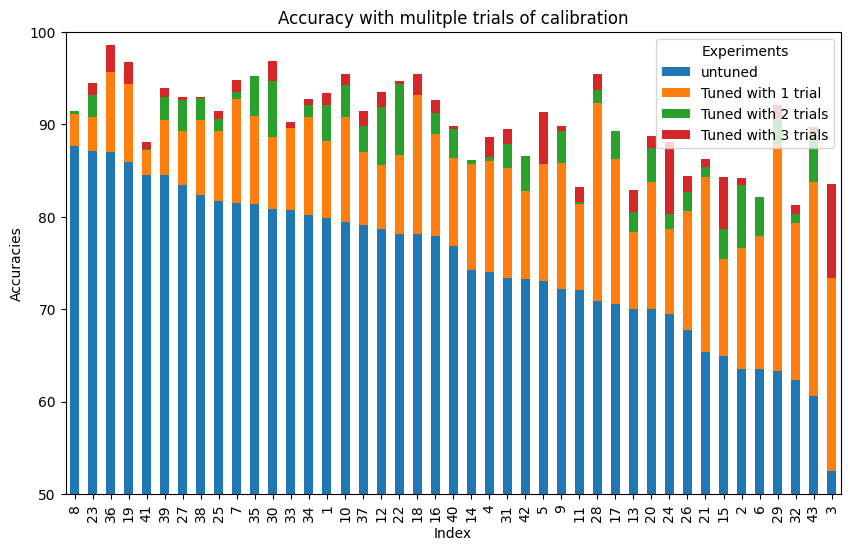

In [122]:
accu_df.sort_values(by = "untuned", ascending=False)\
    .plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Accuracy with mulitple trials of calibration')
plt.ylim([50,100])
plt.xlabel('Index')
plt.ylabel('Accuracies')
plt.legend(title='Experiments', loc='upper right')
plt.show()

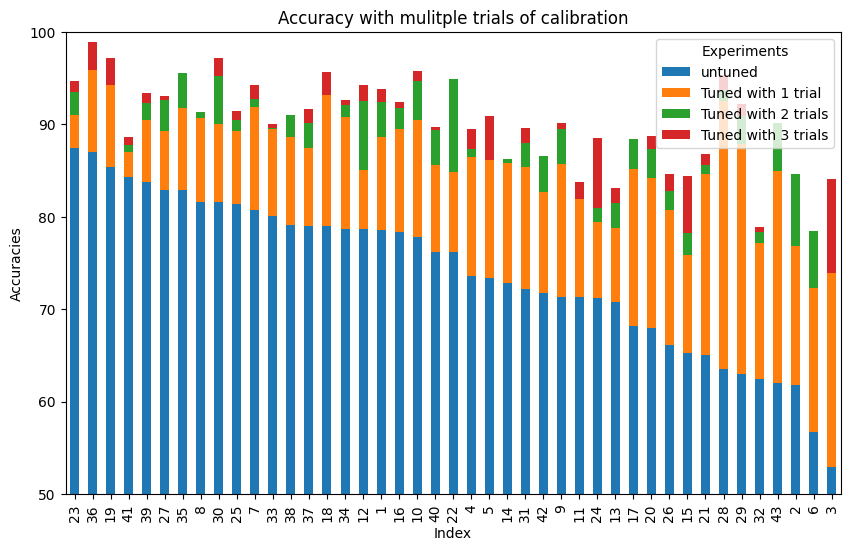

In [126]:
f1_df.sort_values(by = "untuned", ascending=False)\
    .plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Accuracy with mulitple trials of calibration')
plt.ylim([50,100])
plt.xlabel('Index')
plt.ylabel('Accuracies')
plt.legend(title='Experiments', loc='upper right')
plt.show()

In [80]:
grouped_columns = ['untuned_a', 'untuned_f']

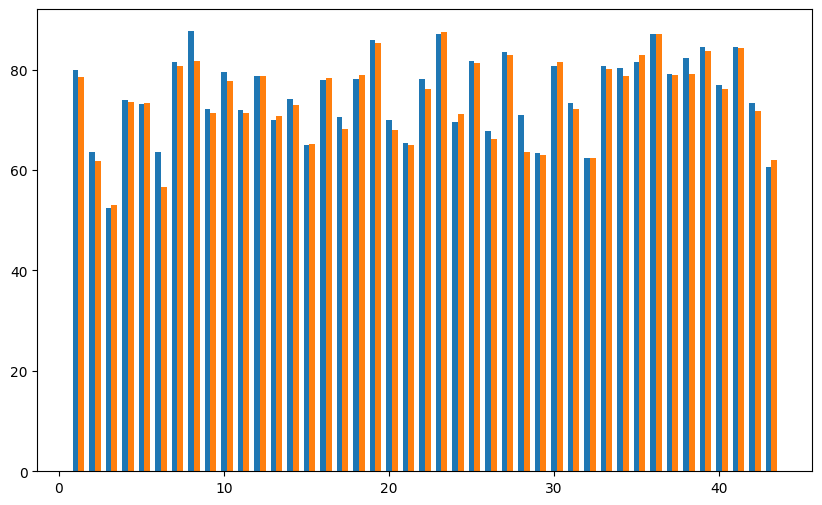

In [81]:

# Plotting a stacked and grouped bar chart
# fig, ax = plt.subplots(figsize=(10, 6))
# bar_width = 0.35  # Width of the bars
# index = total_df['participants']

# bar1 = ax.bar(index, total_df[grouped_columns[0]], bar_width, label=grouped_columns[0])
# bar2 = ax.bar(index + bar_width, total_df[grouped_columns[1]], bar_width, label=grouped_columns[1])

86


Text(0.5, 1.0, 'Variability in participant performance')

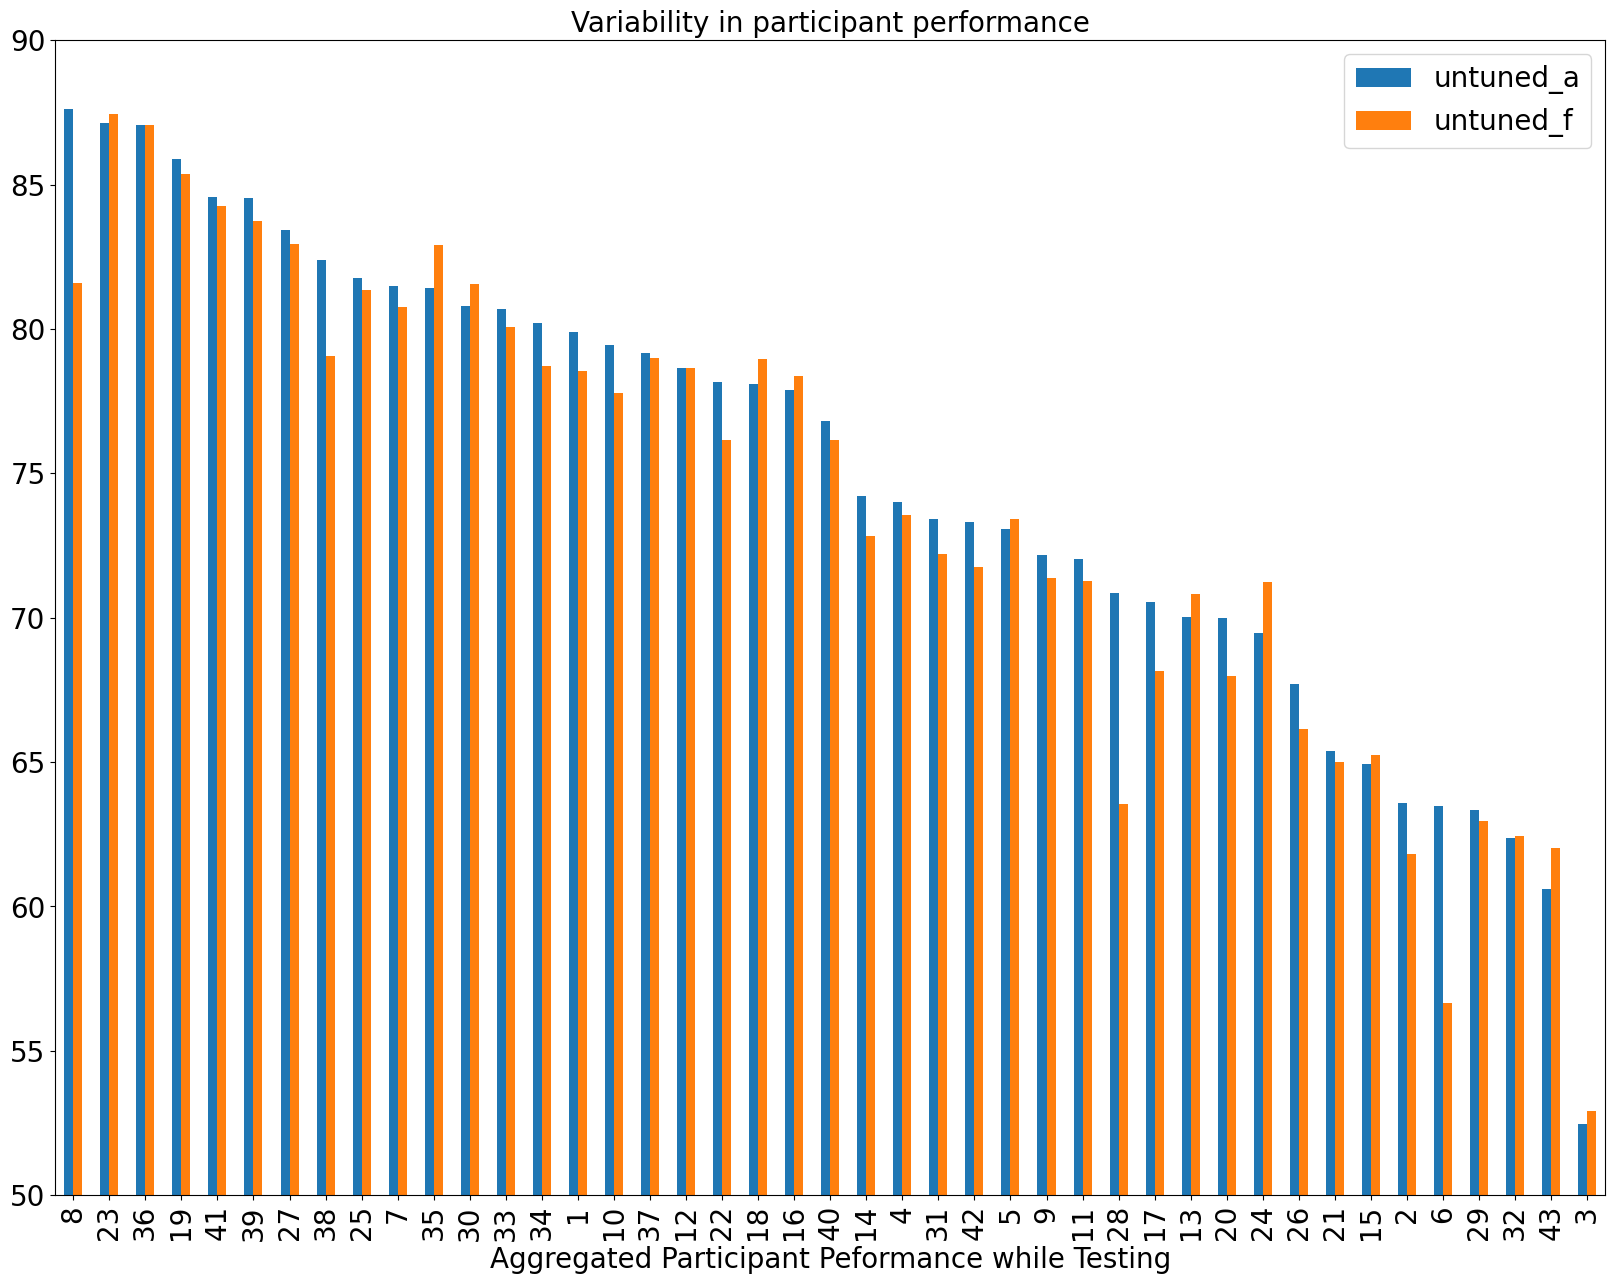

In [86]:
ax = total_df.sort_values(by = "untuned_a", ascending=False)\
            .plot.bar(x = 'participants', y = ["untuned_a", "untuned_f"], figsize = (20,15))

bar_to_color = 'overall'
# ax.patches[0].set_color("green")
# ax.patches[43].set_color("green")

# for bar in ax.patches:
#     if bar.get_height() == df.loc[bar.get_x(), 'Accuracy']:
#         bar.set_color(color)
#     print(bar)
print(len(ax.patches))

plt.ylim([50,90])
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Aggregated Participant Peformance while Testing", fontsize=20)
plt.title("Variability in participant performance", fontsize=20)